In [1]:
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import os
import pandas as pd
import time
import re
import seaborn
from lxml import html
import matplotlib

%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

Получаем 250 самых топовых фильмов

In [2]:
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

Парсим страницу с фильмами и получаем грязные данные с


1.   Названием фильма
2.   Рейтингом
3.   Командой 
4.   Ссылкой на основную страницу




In [3]:
movies = soup.select('td.titleColumn')
links = [a.attrs.get('href') for a in soup.select('td.titleColumn a')]
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=ir]')]

In [4]:
data_frame = {
    "movies": movies,
    "ratings": ratings,
    "crew": crew,
    "links": links
}

data = pd.DataFrame(data_frame)
data

,movies,ratings,crew,links
0,"[\n 1.\n , [Побег из Шоушенка], \n, ...",9.235260382230026,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/
1,"[\n 2.\n , [Крёстный отец], \n, [(19...",9.156141635048062,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/
2,"[\n 3.\n , [Темный рыцарь], \n, [(20...",8.98955480535035,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/
3,"[\n 4.\n , [Крёстный отец 2], \n, [(...",8.984035722738438,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/
4,"[\n 5.\n , [12 рaзгневанных мужчин],...",8.95108256269466,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/
...,...,...,...,...
245,"[\n 246.\n , [Дерсу Узала], \n, [(19...",8.006849288525274,"Akira Kurosawa (dir.), Maksim Munzuk, Yuriy So...",/title/tt0071411/
246,"[\n 247.\n , [Стальной гигант], \n, ...",8.005097618784397,"Brad Bird (dir.), Eli Marienthal, Harry Connic...",/title/tt0129167/
247,"[\n 248.\n , [Аладдин], \n, [(1992)]...",8.005065649833636,"Ron Clements (dir.), Scott Weinger, Robin Will...",/title/tt0103639/
248,"[\n 249.\n , [Прислуга], \n, [(2011)...",8.00490748004077,"Tate Taylor (dir.), Viola Davis, Emma Stone",/title/tt1454029/


Несколько функциий для преобзразования грязных заголовков с названием фильмов


In [5]:
def process_text_mv(text):
    data = text.get_text().split("\n")
    return data[2].strip()

In [6]:
def process_text_year(text):
    data = text.get_text().split("\n")
    return data[3].strip()[1:-1]

In [7]:
data["title"] = data.movies.apply(process_text_mv)
data["year"] = data.movies.apply(process_text_year)

In [8]:
data.head()

,movies,ratings,crew,links,title,year
0,"[\n 1.\n , [Побег из Шоушенка], \n, ...",9.235260382230026,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,Побег из Шоушенка,1994
1,"[\n 2.\n , [Крёстный отец], \n, [(19...",9.156141635048062,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,Крёстный отец,1972
2,"[\n 3.\n , [Темный рыцарь], \n, [(20...",8.98955480535035,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,Темный рыцарь,2008
3,"[\n 4.\n , [Крёстный отец 2], \n, [(...",8.984035722738438,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,Крёстный отец 2,1974
4,"[\n 5.\n , [12 рaзгневанных мужчин],...",8.95108256269466,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 рaзгневанных мужчин,1957


In [9]:
data.crew[1]

'Francis Ford Coppola (dir.), Marlon Brando, Al Pacino'

Задача 1.
Получить список всех участников команд (убрать постфикс `(dir.)` у директоров). Найти количество уникальных имен. 

In [10]:
# решение:

members = []

for member in data.crew:
    member = member.replace(" (dir.)", "").split(", ")
    for i in member:
        members.append(i)
        
members = set(members)
print("Количество уникальных участников:", len(members))
print("Список всех участников: ", end="")
print(*members, sep=", ")

Количество уникальных участников: 527
Список всех участников: Natalie Portman, Karen Allen, Mone Kamishiraishi, Sylvester Stallone, Marion Mack, Sigourney Weaver, Stanley Kramer, Akira Ishihama, Mack Swain, Daveigh Chase, Victor Fleming, Aleksey Kravchenko, Gary Lockwood, Jim Carrey, Ian McKellen, Graham Chapman, Çagan Irmak, Terry Gilliam, Payman Maadi, Gene Hackman, Hitoshi Takagi, Tate Taylor, Max von Sydow, Yasujirô Ozu, Fikret Kuskan, Gary Oldman, Dan Kwan, Michelle Yeoh, Ben Burtt, Machiko Kyô, Michael Kenneth Williams, Ron Howard, Stanley Donen, Robert Wise, F. Murray Abraham, Darsheel Safary, Jake Johnson, John Goodman, Don Cheadle, Richard Gere, Steve McQueen, Shameik Moore, Thomas Bo Larsen, John Lasseter, Joaquin Phoenix, Robin Williams, Michel Gondry, Gillo Pontecorvo, Joseph Gordon-Levitt, John McTiernan, Harrison Ford, David Carradine, Gunnar Björnstrand, Luc Besson, Song Kang-ho, Clark Gable, Wil Wheaton, Jacob Tremblay, Anthony Gonzalez, Adrien Brody, Lana Wachowski, Ni

Задача 2.
Получить список всех директоров. Построить распределение (визуализация обязательна) и найти директора(ов), у которого(ых) больше всего фильмов в топе.

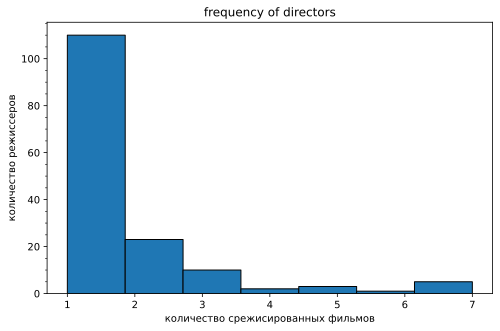

Директора, у которых больше всего фильмов в топе: Martin Scorsese, Akira Kurosawa, Christopher Nolan, Steven Spielberg, Stanley Kubrick


In [11]:
# решение:

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

directors = []
for director in data.crew:
    director = director.replace(" (dir.)", "").split(", ")
    directors.append(director[0])

directors_unique = list(set(directors)) 

data["director only"] = directors

visual = data["director only"].value_counts()
fig, ax = plt.subplots()
plt.hist(visual, edgecolor = "black", bins=7, align="mid")
plt.title("frequency of directors")
ax.set_xlabel("количество срежисированных фильмов")
ax.set_ylabel("количество режиссеров")
ax.yaxis.set_major_locator(ticker.MultipleLocator(20))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))
plt.show()

max_for_director = data["director only"].value_counts().max()
result = [i[0] for i in data["director only"].value_counts().items() if i[1] == 7]
print("Директора, у которых больше всего фильмов в топе: ", end="")
print(*result, sep=", ")


Задача 3. Найти участника(ов) команд, у которого(ых) больше всего фильмов в топе.

In [12]:
# решение:

members = []
for member in data.crew:
    member = member.replace(" (dir.)", "").split(", ")
    for i in member:
        members.append(i)

result = pd.Series(members)

cnt = result.value_counts().max()

most_popular_member = [i[0] for i in result.value_counts().iteritems() if i[1]==cnt]
most_popular_member = str(*most_popular_member)
print(most_popular_member)

Charles Chaplin


Задача 4. Построить распределение топовых фильмов по годам

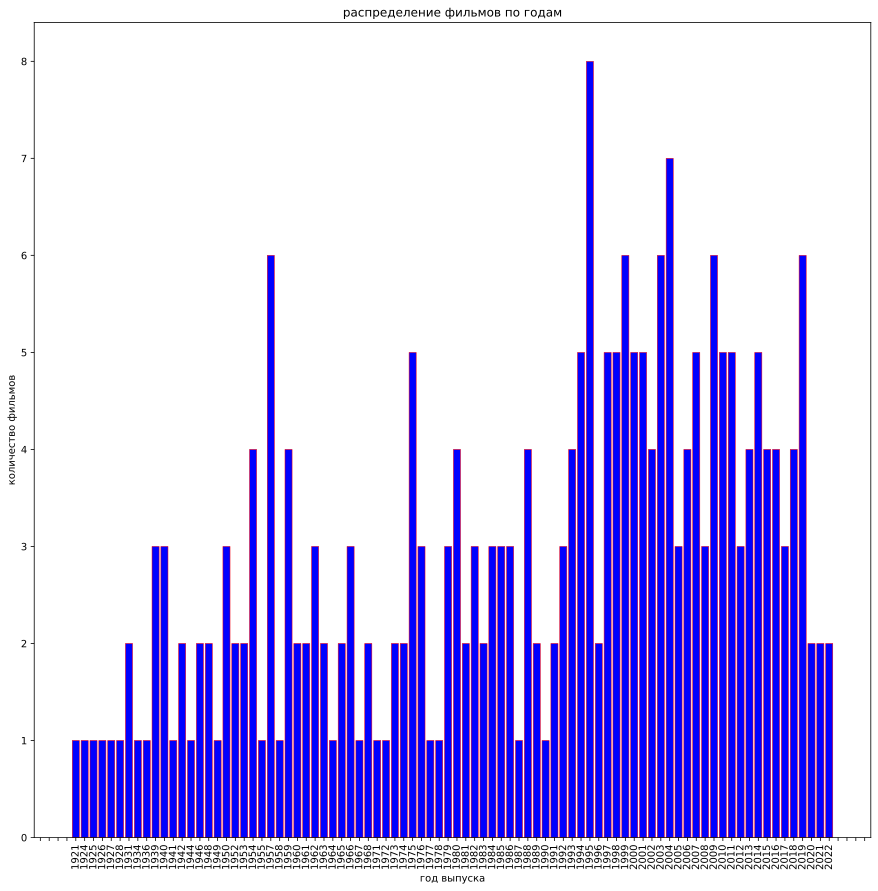

In [13]:
# решение:

year = [data[0] for data in data["year"].value_counts().iteritems()]
count_year = [data[1] for data in data["year"].value_counts().iteritems()]
result = {"year":year, "count year": count_year}
countFilms_x_year = pd.DataFrame(result)

countFilms_x_year = countFilms_x_year.sort_values(by="year", ascending=True)

fig, ax = plt.subplots()
ax.bar(countFilms_x_year["year"], countFilms_x_year["count year"], edgecolor = "red", linewidth = 0.5, color = "blue")
plt.title("распределение фильмов по годам")
ax.set_xlabel("год выпуска")
ax.set_ylabel("количество фильмов")
plt.xticks(rotation=90)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
fig.set_figwidth(15)
fig.set_figheight(15)
plt.show()

Задача 5. Построить распределение топовых фильмов рейтингу:


*   Округлить до сотых и отрисовать
*   Округлить до десятых и отрисовать
*   Округлить до целых и отрисовать

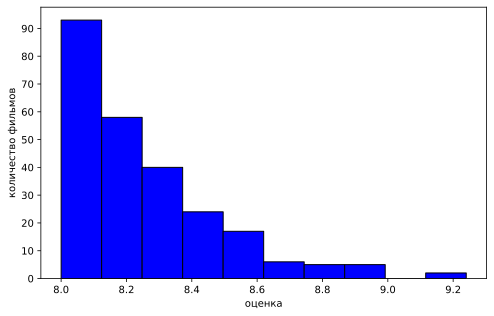

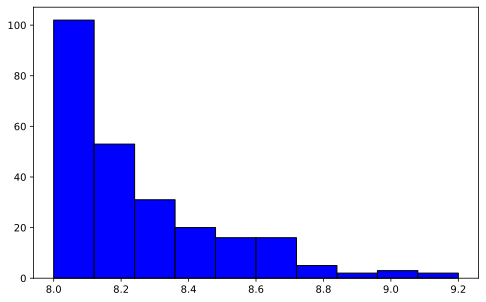

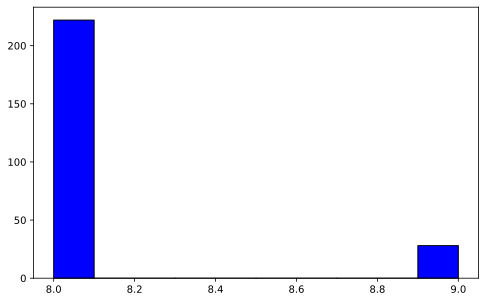

In [14]:
# решение:

data[["ratings"]] = data[["ratings"]].apply(pd.to_numeric)

data.ratings = data.ratings.round(2)
fig, ax = plt.subplots()
plt.hist(data.ratings, color = "blue", edgecolor = "black")
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.set_xlabel("оценка")
ax.set_ylabel("количество фильмов")
fig.set_figwidth(8)
fig.set_figheight(5)
plt.show()

data.ratings = data.ratings.round(1)
plt.hist(data.ratings, color = "blue", edgecolor = "black")
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.set_xlabel("оценка")
ax.set_ylabel("количество фильмов")
fig.set_figwidth(8)
fig.set_figheight(5)
plt.show()

data.ratings = data.ratings.round(0)
plt.hist(data.ratings, color = "blue", edgecolor = "black")
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.set_xlabel("оценка")
ax.set_ylabel("количество фильмов")
fig.set_figwidth(8)
fig.set_figheight(5)
plt.show()

Задача 6. Используйте ссылку `http://www.imdb.com/` и динамически добавляя ссылку на фильм из колонки `links` соберите описание фильмов. Пример поиска необходимого текст представлен ниже. Добавьте эту информацию в исходный датафрейм.

In [15]:
 film_url = 'http://www.imdb.com/title/tt0068646/'
 html_text = requests.get(film_url).text

In [ ]:
soup = BeautifulSoup(html_text, 'lxml')
soup.find_all(attrs={"name": "description"})[0].get("content")

In [16]:
# решение:

In [17]:
! pip install fake_useragent

Defaulting to user installation because normal site-packages is not writeable


In [18]:
from fake_useragent import UserAgent # убираю ошибку 403 при парсинге, в юпитере мб не нужна эта библиотека

ua = UserAgent()
url = "http://www.imdb.com"
headers = {"User-Agent": ua.chrome}
list_for_add = []
cnt = 0
for link in data["links"]:
    film_url = url+link
    html_text = requests.get(film_url, headers=headers).text
    soup = BeautifulSoup(html_text, "lxml")
    cnt+=1

    list_for_add.append(soup.find("meta", attrs={"name": "description"}).get("content"))
    print("complete", cnt)

data["describe"] = list_for_add 

print(data["describe"])

complete 1
complete 2
complete 3
complete 4
complete 5
complete 6
complete 7
complete 8
complete 9
complete 10
complete 11
complete 12
complete 13
complete 14
complete 15
complete 16
complete 17
complete 18
complete 19
complete 20
complete 21
complete 22
complete 23
complete 24
complete 25
complete 26
complete 27
complete 28
complete 29
complete 30
complete 31
complete 32
complete 33
complete 34
complete 35
complete 36
complete 37
complete 38
complete 39
complete 40
complete 41
complete 42
complete 43
complete 44
complete 45
complete 46
complete 47
complete 48
complete 49
complete 50
complete 51
complete 52
complete 53
complete 54
complete 55
complete 56
complete 57
complete 58
complete 59
complete 60
complete 61
complete 62
complete 63
complete 64
complete 65
complete 66
complete 67
complete 68
complete 69
complete 70
complete 71
complete 72
complete 73
complete 74
complete 75
complete 76
complete 77
complete 78
complete 79
complete 80
complete 81
complete 82
complete 83
complete 84
c

In [19]:
data['describe']

0      Побег из Шоушенка: Directed by Frank Darabont....
1      Крёстный отец: Directed by Francis Ford Coppol...
2      Темный рыцарь: Directed by Christopher Nolan. ...
3      Крёстный отец 2: Directed by Francis Ford Copp...
4      12 рaзгневанных мужчин: Directed by Sidney Lum...
                             ...                        
245    Дерсу Узала: Directed by Akira Kurosawa. With ...
246    Стальной гигант: Directed by Brad Bird. With J...
247    Аладдин: Directed by Ron Clements, John Musker...
248    Прислуга: Directed by Tate Taylor. With Emma S...
249    Ганди: Directed by Richard Attenborough. With ...
Name: describe, Length: 250, dtype: object

Задача 7. С помощью регулярных выражений найдите в текстах описания фильмов имена актеров, если это возможно (то есть - они там упоминаются). Добавьте эту информацию в датафрейм и посчитайте, для скольких фильмов получилось это сдлеать. Подсказка: перечисление актеров иногда начинается с with. 

In [21]:
# решение:

list_for_add = ""
cnt = 0

starrings = []
for desc in data["describe"]:
    desc = desc.split("With")[1]
    desc = re.split("(?<![A-Z])\. ", desc)[0]
                                                
    starrings.append(desc)

print("Для скольких фильмов получилось найти в текстах описания фильмов имена актеров: ", len(starrings))
data["starrings"] = starrings

data.starrings

Для скольких фильмов получилось найти в текстах описания фильмов имена актеров:  250


0       Tim Robbins, Morgan Freeman, Bob Gunton, Will...
1       Marlon Brando, Al Pacino, James Caan, Richard...
2       Christian Bale, Heath Ledger, Aaron Eckhart, ...
3       Al Pacino, Robert Duvall, Diane Keaton, Rober...
4       Martin Balsam, John Fiedler, Lee J. Cobb, E.G...
                             ...                        
245     Yuriy Solomin, Maksim Munzuk, Mikhail Bychkov...
246     Jennifer Aniston, Harry Connick Jr., Vin Dies...
247     Scott Weinger, Robin Williams, Linda Larkin, ...
248     Emma Stone, Viola Davis, Bryce Dallas Howard,...
249     Ben Kingsley, Rohini Hattangadi, Roshan Seth,...
Name: starrings, Length: 250, dtype: object

Задача 8. Распарсите исходную страницу с топ-250 фильмов и получите для каждого фильмов количество оценок. Пример текста в исходной странице:`9.2 based on 2,554,919 user ratings`. Из этого текста нужно достать = `2,554,919`. Подсказка: используя метод `find_all` с аргументом `attrs` в который нужно передать `{'class': 'ratingColumn imdbRating'}` от страници `http://www.imdb.com/chart/top`. Найдите 10 фильмов (вывести их название и кол-во оценок) у которых, самое большое количество оценок.

In [26]:
# решение:

url = "http://www.imdb.com/chart/top"
response = requests.get(url)
soup = BeautifulSoup(response.text, "lxml")

ratio_count = []
for el in soup.find_all("strong"):
    num_of_rat = int(el["title"].split(" ")[3].replace(",", ""))
    ratio_count.append(num_of_rat)

data["number_of_reviews"] = ratio_count

result = data[["title", "number_of_reviews"]].sort_values("number_of_reviews", ascending=False).head(10)

res=[(f'{num+1}. {result["title"][i]} - {result["number_of_reviews"][i]} оценок') for num, i in enumerate(result.index)]
print(*res, sep="\n")

1. Побег из Шоушенка - 2671882 оценок
2. Темный рыцарь - 2644731 оценок
3. Начало - 2344191 оценок
4. Бойцовский клуб - 2117305 оценок
5. Форрест Гамп - 2071855 оценок
6. Криминальное чтиво - 2046874 оценок
7. Матрица - 1908446 оценок
8. Властелин колец: Братство кольца - 1870658 оценок
9. Крёстный отец - 1851768 оценок
10. Властелин колец: Возвращение короля - 1841393 оценок


Задача 9. Постройте топ 10 слов, которые встречаются 

1.   в названии фильмов
2.   в описании фильмов
3.   в названии и в описании фильмов

In [27]:
# решение:

!pip install wordcloud

import warnings 
warnings.filterwarnings("ignore")

from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.corpus import stopwords

Defaulting to user installation because normal site-packages is not writeable


           0
человек    4
отец       4
властелин  3
эпизод     3
войны      3
звёздные   3
история    3
однажды    3
колец      3
жизнь      3


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\асек\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


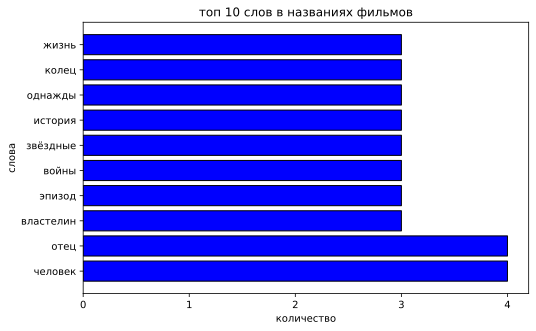

In [28]:
# решение 1 - в названии фильмов:

import nltk
nltk.download("stopwords")

pattern = re.compile(r'[a-zA-Zа-яА-ЯёЁ]+')
eng_stops = stopwords.words("english")
rus_stops = stopwords.words("russian")

all_words_from_titles = []

for name in data.title:
    name = pattern.findall(name)
    for num, el in enumerate(name):
        name[num] = name[num].lower()
    all_words_from_titles.extend(name)


result = [word for word in all_words_from_titles if word not in eng_stops and word not in rus_stops]

top_word_from_title = pd.Series(result)
top_word_from_title = top_word_from_title.value_counts().head(10)
top_word_from_title = top_word_from_title.to_frame()

print(top_word_from_title)

fig, ax = plt.subplots()
ax.barh(top_word_from_title.index, top_word_from_title[0], color = "blue", edgecolor = "black")
plt.title("топ 10 слов в названиях фильмов")
ax.set_xlabel("количество")
ax.set_ylabel("слова")

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.show()

            0
directed  250
life       30
young      30
john       30
two        27
robert     25
james      23
man        23
war        23
new        22


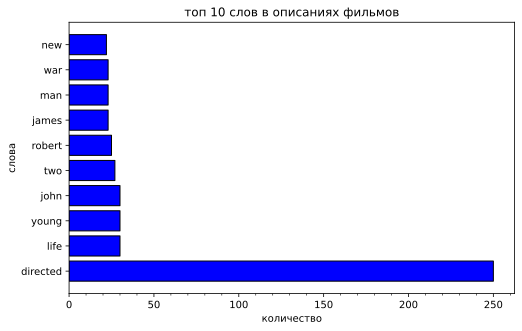

In [32]:
# решение 2 - в описании фильмов:

all_words_from_desc = []

for name in data["describe"]:
    name = pattern.findall(name)
    for num, el in enumerate(name):
        name[num] = name[num].lower()
    all_words_from_desc.extend(name)


result = [word for word in all_words_from_desc if word not in eng_stops and word not in rus_stops]

top_word_from_desc = pd.Series(result)
top_word_from_desc = top_word_from_desc.value_counts().head(10)
top_word_from_desc = top_word_from_desc.to_frame()

print(top_word_from_desc)


fig, ax = plt.subplots()
ax.barh(top_word_from_desc.index, top_word_from_desc[0],color = "blue", edgecolor = "black")
plt.title("топ 10 слов в описаниях фильмов")
ax.set_xlabel("количество")
ax.set_ylabel("слова")

ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(10))

plt.show()

            0
directed  250
life       30
john       30
young      30
two        27
robert     25
man        23
james      23
war        23
new        22


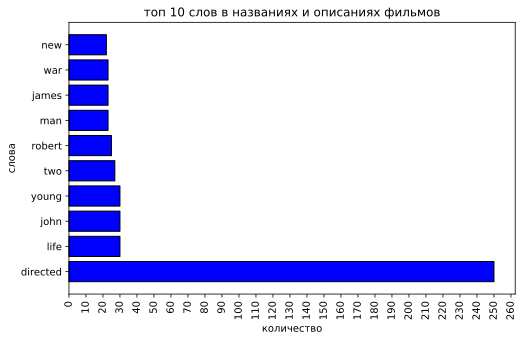

In [33]:
# решение 1 - в названии и в описании фильмов:

all_words_from_desc_title = []

for name in data.title:
    name = pattern.findall(name)
    for num, el in enumerate(name):
        name[num] = name[num].lower()
    all_words_from_desc_title.extend(name)

for name in data["describe"]:
    name = pattern.findall(name)
    for num, el in enumerate(name):
        name[num] = name[num].lower()
    all_words_from_desc_title.extend(name)


result = [word for word in all_words_from_desc_title if word not in eng_stops and word not in rus_stops]

top_word_from_desc_title = pd.Series(result)
top_word_from_desc_title = top_word_from_desc_title.value_counts().head(10)
top_word_from_desc_title = top_word_from_desc_title.to_frame()

print(top_word_from_desc_title)

fig, ax = plt.subplots()
ax.barh(top_word_from_desc_title.index, top_word_from_desc_title[0], color = "blue", edgecolor = "black")
plt.title("топ 10 слов в названиях и описаниях фильмов")
ax.set_xlabel("количество")
ax.set_ylabel("слова")
plt.xticks(rotation=90)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))

plt.show()

Задача 10*. Спарсить теги фильмов со страницы каждого фильма, так например для `The Godfather` ожидается получить список из `Crime, Drama`. (Можно увидеть эти теги по картинкой к фильму)

In [35]:
# решение:

import json
from fake_useragent import UserAgent
ua = UserAgent()
headers = {"User-Agent": ua.chrome}

genres_from_all = []
cnt = 0
url = "http://www.imdb.com"

for link in data["links"]:
    film_url = url+link
    html_text = requests.get(film_url, headers=headers).text
    soup = BeautifulSoup(html_text, "lxml")
    cnt+=1

    js_data = [i.get_text() for i in soup.find_all('script', type="application/ld+json")]
    genres = json.loads(*js_data)
    genres_from_all.append(", ".join(genres["genre"]))
    print("complete", cnt)

data["genres"] = genres_from_all
data["genres"]

complete 1
complete 2
complete 3
complete 4
complete 5
complete 6
complete 7
complete 8
complete 9
complete 10
complete 11
complete 12
complete 13
complete 14
complete 15
complete 16
complete 17
complete 18
complete 19
complete 20
complete 21
complete 22
complete 23
complete 24
complete 25
complete 26
complete 27
complete 28
complete 29
complete 30
complete 31
complete 32
complete 33
complete 34
complete 35
complete 36
complete 37
complete 38
complete 39
complete 40
complete 41
complete 42
complete 43
complete 44
complete 45
complete 46
complete 47
complete 48
complete 49
complete 50
complete 51
complete 52
complete 53
complete 54
complete 55
complete 56
complete 57
complete 58
complete 59
complete 60
complete 61
complete 62
complete 63
complete 64
complete 65
complete 66
complete 67
complete 68
complete 69
complete 70
complete 71
complete 72
complete 73
complete 74
complete 75
complete 76
complete 77
complete 78
complete 79
complete 80
complete 81
complete 82
complete 83
complete 84
c

0                             Drama
1                      Crime, Drama
2              Action, Crime, Drama
3                      Crime, Drama
4                      Crime, Drama
                   ...             
245     Adventure, Biography, Drama
246    Animation, Action, Adventure
247    Animation, Adventure, Comedy
248                           Drama
249       Biography, Drama, History
Name: genres, Length: 250, dtype: object

In [36]:
data["genres"]

0                             Drama
1                      Crime, Drama
2              Action, Crime, Drama
3                      Crime, Drama
4                      Crime, Drama
                   ...             
245     Adventure, Biography, Drama
246    Animation, Action, Adventure
247    Animation, Adventure, Comedy
248                           Drama
249       Biography, Drama, History
Name: genres, Length: 250, dtype: object